In [1]:
!pip install librosa

  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320724 sha256=2fd54153579fd5bedc4672d0ce4b83bf873ffc9e0135ee707c19e4166dc9161f
  Stored in directory: c:\users\irisj\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23146 sha256=d08b81a1c096ecd34db94b5553333f900c270ba6ee4d0038c7369eccd95916e6
  Stored in directory: c:\users\irisj\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
Successfully built resampy audioread


In [2]:
import matplotlib.pyplot as plt

In [26]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 1666-03D5

 Directory of C:\Users\irisj\UST Global Tech

21-07-2021  12:30    <DIR>          .
21-07-2021  12:30    <DIR>          ..
21-07-2021  12:09    <DIR>          .ipynb_checkpoints
21-07-2021  12:29           705,644 dogbarking.wav
18-07-2021  17:51         1,616,728 Features_2500RPM_0dB_full.mat
18-07-2021  17:51         1,600,255 Features_2500RPM_15dB_full.mat
18-07-2021  17:51         1,580,278 Features_2500RPM_30dB_full.mat
18-07-2021  17:51         1,547,206 Features_2500RPM_60dB_full.mat
21-07-2021  10:42             3,114 First.ipynb
21-07-2021  12:30            18,560 Untitled.ipynb
               7 File(s)      7,071,785 bytes
               3 Dir(s)  35,498,684,416 bytes free


In [5]:
%matplotlib inline

In [29]:
filename='UrbanSound8K/dogbarking.wav'
import IPython.display as ipd
import librosa
import librosa.display

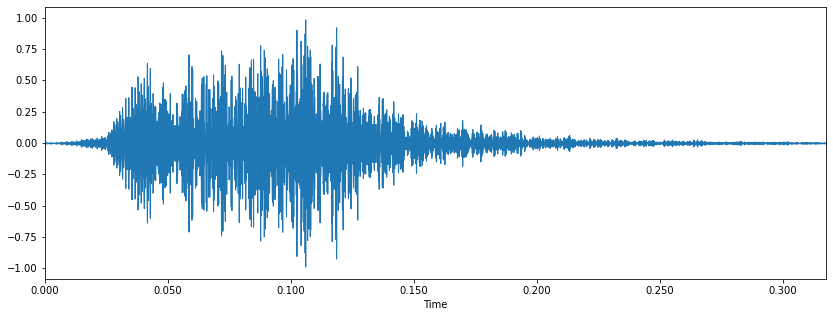

In [58]:
#dog barking sound
#100032-3-0-0
filename='UrbanSound8K/100032-3-0-0.wav'

plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)#by default reads sample rate

In [33]:
sample_rate#num of sound samples per sec

22050

In [45]:
!pip install Scipy

In [46]:
import scipy


In [47]:
from scipy.io import wavfile as wav

In [48]:
wave_sample_rate,wave_audio=wav.read(filename)

In [49]:
wave_sample_rate

44100

In [51]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [-399, -115],
       [-388, -111],
       [-386, -105]], dtype=int16)

In [52]:
data#libroa loaded file

array([ 0.        ,  0.        ,  0.        , ..., -0.00792928,
       -0.00775586, -0.00803613], dtype=float32)

In [54]:
import pandas as pd
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8k.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [55]:
metadata['class'].value_counts()

air_conditioner     1000
drilling            1000
street_music        1000
jackhammer          1000
dog_bark            1000
engine_idling       1000
children_playing    1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [59]:
#Data preprocessing

In [60]:
audio_file_path='UrbanSound8K/100032-3-0-0.wav'

In [61]:
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [62]:
librosa_audio_data

array([-0.00346022, -0.00502555, -0.00465325, ..., -0.00248061,
       -0.00155105, -0.0003528 ], dtype=float32)

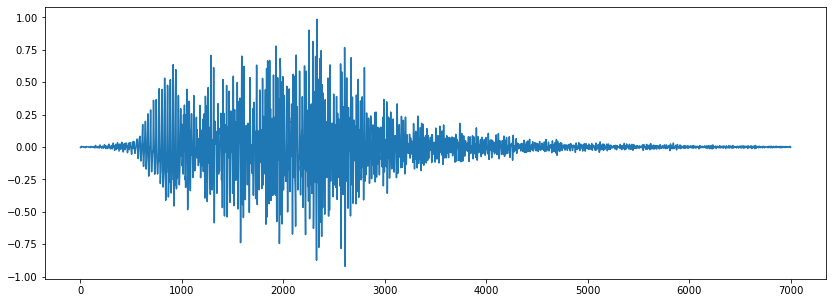

In [64]:
plt.figure(figsize=(14,5))
plt.plot(librosa_audio_data)

In [65]:
from scipy.io import wavfile as wav

In [66]:
wave_sample_rate,wave_audio=wav.read(audio_file_path)

In [67]:
wave_audio

array([[-150, -148],
       [-160, -157],
       [-151, -151],
       ...,
       [ -19,  -24],
       [ -14,  -18],
       [   1,   -1]], dtype=int16)

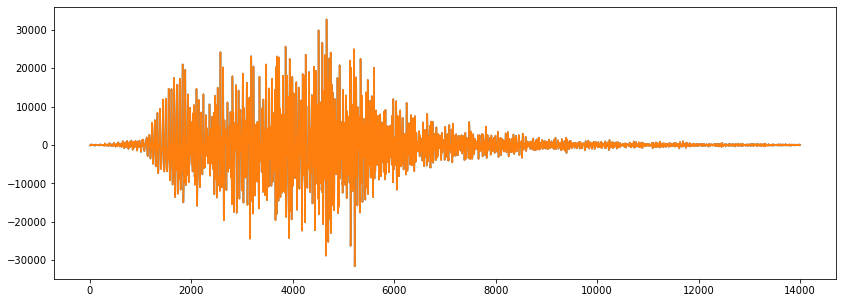

In [69]:
plt.figure(figsize=(14,5))
plt.plot(wave_audio)#2 channels

In [70]:
#Extract features -Mel Frequency epstral Coefficients
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)

In [73]:
mfccs.shape

(40, 14)

In [74]:
import os
audio_dataset_path='UrbanSound8K/audio'
metadataset=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [75]:
metadataset


,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [76]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [78]:
import numpy as np
from tqdm import tqdm

extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [04:20, 15.02it/s]C:\Users\irisj\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
8324it [09:48, 19.65it/s]C:\Users\irisj\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
8329it [09:48, 23.94it/s]C:\Users\irisj\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [10:14, 14.21it/s]


In [79]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [80]:

### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [81]:
X.shape

(8732, 40)

In [82]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [83]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [84]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [85]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [86]:

import tensorflow as tf
print(tf.__version__)

2.5.0


In [87]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [88]:

### No of classes
num_labels=y.shape[1]

In [89]:

model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [91]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [93]:

model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [94]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 1s 4ms/step - loss: 9.0743 - accuracy: 0.1203 - val_loss: 2.2929 - val_accuracy: 0.1070

Epoch 00001: val_loss improved from inf to 2.29285, saving model to saved_models\audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 1s 2ms/step - loss: 2.5196 - accuracy: 0.1234 - val_loss: 2.2814 - val_accuracy: 0.1070

Epoch 00002: val_loss improved from 2.29285 to 2.28140, saving model to saved_models\audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 1s 2ms/step - loss: 2.3353 - accuracy: 0.1168 - val_loss: 2.2749 - val_accuracy: 0.1070

Epoch 00003: val_loss improved from 2.28140 to 2.27487, saving model to saved_models\audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 1s 2ms/step - loss: 2.2904 - accuracy: 0.1152 - val_loss: 2.2715 - val_accuracy: 0.1070

Epoch 00004: val_loss improved from 2.27487 to 2.27155, saving model to saved_models\audio_clas

In [95]:

test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7630223035812378


In [96]:

prediction_feature.shape

NameError: name 'prediction_feature' is not defined